# Wilt Data Set Decision Tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfTrain=pd.read_csv("../Classification/wilt_traindt.csv")
dfTrain.drop(['Unnamed: 0'],axis=1,inplace=True)
dfTrain.head()

,GLCM_pan,Mean_NIR,SD_pan,Class,Mean_Green_log,Mean_Red_log
0,120.362774,416.581395,20.676318,1,5.325446,4.782440
1,124.739583,354.333333,16.707151,1,5.312220,4.747826
2,134.691964,477.857143,22.496712,1,5.294740,4.760952
3,127.946309,278.473684,14.977453,1,5.183851,4.525785
4,135.431548,532.952381,17.604193,1,5.283204,4.724645


In [3]:
X=dfTrain[['GLCM_pan','Mean_NIR','SD_pan','Mean_Green_log','Mean_Red_log']]
Y=dfTrain['Class'].values

In [4]:
### normalize:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit(X).transform(X)
X_norm=pd.DataFrame(X_norm)
X_norm.head()


,0,1,2,3,4
0,-0.475180,-0.764405,-0.388399,-0.575692,0.278598
1,-0.156213,-1.166831,-0.756342,-0.646968,0.166728
2,0.569083,-0.368266,-0.219648,-0.741174,0.209150
3,0.077483,-1.657253,-0.916686,-1.338769,-0.550893
4,0.622982,-0.012082,-0.673186,-0.803342,0.091807


In [5]:
X_norm.mean(),X_norm.std()

(0    4.607451e-16
 1    4.903163e-16
 2   -1.643315e-16
 3   -4.178209e-16
 4   -9.715160e-16
 dtype: float64, 0    1.000116
 1    1.000116
 2    1.000116
 3    1.000116
 4    1.000116
 dtype: float64)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(X_norm,Y,test_size=0.25,random_state=42)
print('xtrain =','\t',xtrain.shape)
print('ytrain =','\t',ytrain.shape)
print('xtest =','\t',xtest.shape)
print('ytest =','\t',ytest.shape)

xtrain = 	 (3233, 5)
ytrain = 	 (3233,)
xtest = 	 (1078, 5)
ytest = 	 (1078,)


In [8]:
model=DecisionTreeClassifier( criterion='gini', max_depth = 7)

wilt_tree=model.fit(xtrain,ytrain)

In [9]:
predTree = wilt_tree.predict(xtest)

In [10]:
print (predTree [0:20])
print (ytest [0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print("DecisionTrees's Accuracy: ", accuracy_score(ytest, predTree))

DecisionTrees's Accuracy:  0.987012987012987


In [13]:
dct = 25
mean_acc_dct = np.zeros((dct-1))
std_acc_dct = np.zeros((dct-1))
ConfustionMx = [];
for n in range(1,dct):
    
    loant = DecisionTreeClassifier(criterion="gini", max_depth = n).fit(xtrain,ytrain)
    
    yhat=wilt_tree.predict(xtest)
    
    mean_acc_dct[n-1] = accuracy_score(ytest, yhat)

    
    std_acc_dct[n-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])

mean_acc_dct


array([0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299,
       0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299,
       0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299,
       0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299,
       0.98701299, 0.98701299, 0.98701299, 0.98701299])

In [14]:
best_depth=mean_acc_dct.argmax()+1
print( "The best accuracy was with", mean_acc_dct.max(), "with max_depth=", mean_acc_dct.argmax()+1) 

The best accuracy was with 0.987012987012987 with max_depth= 1


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

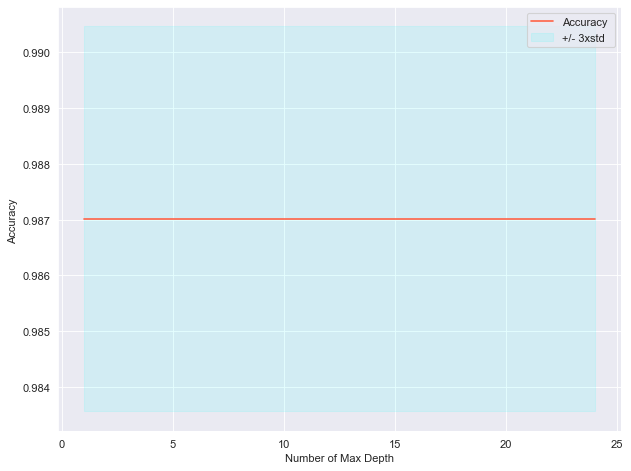

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6),dpi=80)
plt.plot(range(1,dct), mean_acc_dct,'tomato')
plt.fill_between(range(1,dct),mean_acc_dct - 1 * std_acc_dct,mean_acc_dct + 1 * std_acc_dct, alpha=0.10,color='aqua')

plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show();


In [17]:
best_depth

1

## DCTree Model

In [18]:
DCT_model = DecisionTreeClassifier(criterion="gini", max_depth = best_depth).fit(xtrain,ytrain)
DCT_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Model Evaluation using Test set

In [19]:
dfTest=pd.read_csv("../Classification/wilt_testdt.csv")
dfTest.drop(['Unnamed: 0'],axis=1,inplace=True)
dfTest.head()

,class,GLCM_pan,Mean_NIR,SD_pan,Mean_Green_log,Mean_Red_log
0,0,109.828571,251.750000,16.079412,5.213304,4.418238
1,0,130.284483,482.396552,21.210295,5.359591,4.573644
2,0,131.386555,419.666667,13.339998,5.222875,4.448126
3,0,141.345098,348.062500,18.213577,5.197806,4.400603
4,1,121.383408,426.607143,19.083196,5.386132,4.718658


In [20]:
X_test=dfTest[['GLCM_pan','Mean_NIR','SD_pan','Mean_Green_log','Mean_Red_log']]
Y_test=dfTest['class'].values

In [21]:
X_test_norm=StandardScaler().fit(X_test).transform(X_test)
X_test_norm=pd.DataFrame(X_test_norm)
X_test_norm.head()

,0,1,2,3,4
0,-1.617492,-1.294426,-0.675777,-0.709051,-0.805318
1,0.302012,0.183679,0.084290,0.208461,-0.211652
2,0.405427,-0.218327,-1.081583,-0.649020,-0.691142
3,1.339898,-0.677204,-0.359631,-0.806253,-0.872686
4,-0.533231,-0.173849,-0.230809,0.374928,0.342317


### Test DCT Model:

In [22]:
from sklearn.metrics import f1_score,jaccard_similarity_score

In [23]:
DCT_yhat=DCT_model.predict(X_test_norm)
DCT_f1 =f1_score(Y_test, DCT_yhat, average='weighted') 
DCT_jsc = jaccard_similarity_score(Y_test, DCT_yhat)
print('f1 score: ',DCT_f1)
print('Jaccard index: ',DCT_jsc)

f1 score:  0.481064039408867
Jaccard index:  0.624


C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [24]:
Jaccard = [DCT_jsc]
F1_score = [DCT_f1]

dframe = {'Algorithm': ['Decision Tree'], \
     'Jaccard': Jaccard, 'F1-score': F1_score}

Report = pd.DataFrame(data=dframe, columns=['Algorithm', 'Jaccard', 'F1-score'], index=None)
Report

,Algorithm,Jaccard,F1-score
0,Decision Tree,0.624,0.481064


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion = confusion_matrix(Y_test, DCT_yhat)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
pd.DataFrame(data=confusion,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])

[[312   1]
 [187   0]]


,Predicted 0,Predicted 1
Actual 0,312,1
Actual 1,187,0


In [27]:
n_total=TP+TN+FP+FN
n_total

500

In [28]:
True_pred,wrong_pred=TP+TN,FN+FP
TPred=(True_pred*100)/n_total
FPred=(wrong_pred*100)/n_total
print('The model predict has','\t',TPred,'%,True prediction')
print('The model predict has','\t',FPred,'%,False prediction')

The model predict has 	 62.4 %,True prediction
The model predict has 	 37.6 %,False prediction


In [34]:
%run Wilt_DataSet_SVM.ipynb

Train set: (3233, 5) (3233,)
Test set: (1078, 5) (1078,)


C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm_rbf :  	 0.9981447124304267 
svm_linear :  	 0.9990723562152134 
svm_Polynomial :  	 0.987012987012987 
svm_sig :  	 0.9777365491651205 

The label missing in the first model with rbf kernel set()
The label missing in the second model with linear set()
The label missing in the third model with polynomial kernel {1}
The label missing in the fourth model with sigmoid kernel set()
Train set Accuracy:  0.994741725951129
Test set Accuracy:  0.9990723562152134
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1064
           1       0.93      1.00      0.97        14

    accuracy                           1.00      1078
   macro avg       0.97      1.00      0.98      1078
weighted avg       1.00      1.00      1.00      1078

f1 score:  0.5714911550405757
Jaccard index:  0.666
[[311   2]
 [165  22]]
The model predict has 	 66.6 %,True prediction
The model predict has 	 33.4 %,False prediction


C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
